## Riduzione della dimensionalità

### 1. Perché ridurre le dimensioni?

In termini tecnici, ogni colonna del vostro dataset (ogni feature) è una "dimensione". Se avete un file Excel con 1000 colonne, avete uno spazio a 1000 dimensioni.

Lavorare con troppe dimensioni porta alla **Maledizione della Dimensionalità** (*Curse of Dimensionality*):
* **Lentezza:** I modelli impiegano un'eternità ad addestrarsi.
* **Rumore:** Molte colonne sono inutili o correlate tra loro (es. avere sia "altezza in cm" che "altezza in pollici").
* **Overfitting:** Il modello si perde nei dettagli inutili e non impara le regole generali.

L'obiettivo è proiettare i dati da uno spazio ad alta dimensione (High-D) a uno a bassa dimensione (Low-D, solitamente 2D o 3D per visualizzarli, o <100 per l'addestramento).

---

### 2. Le Tecniche Principali

Esistono due grandi famiglie di algoritmi: **Lineari** e **Non-Lineari**.

#### A. PCA (Principal Component Analysis) - Il Classico
La PCA è la tecnica più famosa. È un algoritmo **lineare**.

* **Come funziona:** Immaginate i vostri dati come una nuvola di punti a forma di pallone da rugby. La PCA cerca di ruotare questi punti per trovare l'asse lungo il quale i dati sono più "sparpagliati" (hanno la massima varianza).
    * La **Componente Principale 1 (PC1)** è l'asse di massima varianza (la lunghezza del pallone).
    * La **Componente Principale 2 (PC2)** è perpendicolare alla prima e cattura la seconda direzione più importante (la larghezza).
* **L'analogia:** È come scattare una foto a un oggetto 3D. Volete trovare l'angolazione migliore in modo che l'oggetto non sembri piatto, ma mantenga la sua forma riconoscibile.
* **Quando usarla:** Sempre come primo tentativo. È veloce, deterministica e facile da interpretare.



#### B. t-SNE (t-Distributed Stochastic Neighbor Embedding) - Il Visualizzatore
La PCA fallisce se i dati hanno forme curve complesse (es. una spirale). Qui entra in gioco t-SNE. È un algoritmo **non-lineare** (Manifold Learning).

* **Come funziona:** t-SNE non guarda alla varianza globale, ma alle **distanze locali**. Cerca di capire chi è "vicino di casa" di chi nello spazio originale e prova a mantenere questi vicini uniti anche nello spazio ridotto.
* **Il compromesso:** È fantastico per vedere i "cluster" (gruppi) separati, ma perde il senso della distanza globale. Se due gruppi sono lontani nel grafico t-SNE, non significa necessariamente che siano lontani nella realtà, significa solo che non sono vicini.
* **Quando usarla:** Quasi esclusivamente per la **visualizzazione** di dati complessi (immagini, testi) in 2D o 3D. È computazionalmente pesante.



#### C. UMAP (Uniform Manifold Approximation and Projection) - Il Moderno
UMAP è l'evoluzione di t-SNE. È diventato lo standard *de facto* per la riduzione non lineare.

* **Come funziona:** Simile a t-SNE, si basa sulla topologia (la forma matematica) dei dati.
* **Vantaggi su t-SNE:**
    1.  È molto più **veloce**.
    2.  Preserva meglio la **struttura globale**. Se due cluster sono lontani nel grafico UMAP, probabilmente sono diversi anche nei dati originali.
* **Quando usarla:** Quando t-SNE è troppo lento o quando volete usare i dati ridotti non solo per vederli, ma come input per un altro algoritmo di clustering.

#### D. Autoencoders - La via del Deep Learning
Non sono un singolo algoritmo matematico, ma Reti Neurali.

* **Come funziona:** Si costruisce una rete a forma di clessidra.
    * **Encoder:** Comprime l'input in poche dimensioni (bottleneck).
    * **Decoder:** Cerca di ricostruire l'input originale partendo da quelle poche dimensioni.
* **Il trucco:** Se la rete riesce a ricostruire l'immagine originale passando per il "collo stretto" della clessidra, significa che quella rappresentazione compressa contiene tutte le informazioni vitali.

---

### 3. Tabella Riassuntiva

Ecco una guida rapida per scegliere l'arma giusta:

| Tecnica | Tipo | Velocità | Preservazione Struttura | Uso Principale |
| :--- | :--- | :--- | :--- | :--- |
| **PCA** | Lineare | Altissima | Globale (Varianza) | Pre-processing, Riduzione rumore |
| **t-SNE** | Non-Lineare | Bassa | Locale (Vicini) | Visualizzazione pura |
| **UMAP** | Non-Lineare | Alta | Locale + Globale | Visualizzazione, Clustering |
| **Autoencoders**| Non-Lineare | Variabile | Complessa | Immagini, Audio, Dati molto complessi |




### Il Concetto Chiave: "Cambio di Prospettiva"

Molti pensano che la PCA "cancelli" delle colonne dal dataset. **Sbagliato.**
La PCA crea **nuove** colonne (chiamate *Componenti Principali*) mescolando quelle vecchie.

Immaginate di fotografare un gruppo di corridori dall'alto (3D).

1.  Se scattate la foto da davanti, vedete solo il primo corridore (poca informazione).
2.  Se scattate di lato, vedete la distanza tra tutti i corridori (massima informazione).

La PCA ruota matematicamente i dati finché non trova l'angolazione (l'asse) dove i dati sono più sparpagliati. Quell'asse diventa la **PC1**. Poi cerca il secondo asse migliore (perpendicolare al primo) ed è la **PC2**, e così via.

-----

### La Matematica "Sotto il Cofano" (Semplificata)

Per chi vuole capire il *perché* funziona, ecco i passaggi logici (useremo un po' di LaTeX per le formule):

1.  **Standardizzazione:** Portiamo tutte le feature sulla stessa scala (media 0, varianza 1). Se non lo facciamo, una colonna con numeri grandi (es. "Stipendio") dominerà su una con numeri piccoli (es. "Età").
2.  **Matrice di Covarianza ($C$):** Calcoliamo come ogni variabile varia rispetto alle altre.
    $$C = \frac{1}{n-1} X^T X$$
3.  **Autovalori e Autovettori (Eigenvalues & Eigenvectors):** Qui avviene la magia dell'algebra lineare. Decomponiamo la matrice di covarianza:
      * Gli **Autovettori** ci dicono la *direzione* dei nuovi assi (le frecce rosse nel grafico).
      * Gli **Autovalori** ($\lambda$) ci dicono l'*importanza* (lunghezza) di quegli assi, ovvero quanta varianza spiegano.

-----

### Il Codice: PCA in Python con Scikit-Learn

Useremo il famoso **Iris Dataset** (fiori), che ha 4 dimensioni (lunghezza/larghezza di petali e sepali). Lo ridurremo a 2 dimensioni per poterlo disegnare su un foglio.




Dimensioni originali: (150, 4)
Dimensioni ridotte: (150, 2)
Varianza spiegata dalla PC1: 0.73
Varianza spiegata dalla PC2: 0.23
Totale informazione mantenuta: 0.96


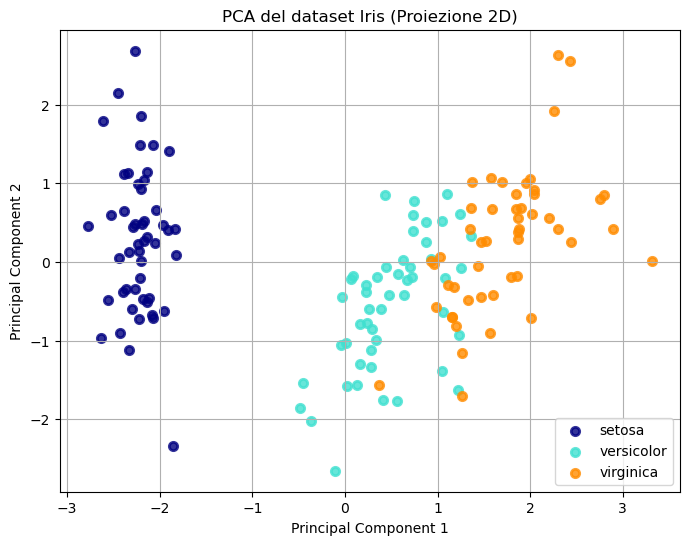

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Caricamento Dati
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print(f"Dimensioni originali: {X.shape}") # (150 righe, 4 colonne)

# 2. STANDARDIZZAZIONE (Passaggio Cruciale!)
# La PCA è sensibilissima alla scala dei dati.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 3. Applicazione PCA
# Chiediamo di ridurre a 2 componenti principali
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print(f"Dimensioni ridotte: {X_pca.shape}") # (150 righe, 2 colonne)

# 4. Analisi della Varianza Spiegata
# Quanta informazione abbiamo mantenuto scartando 2 dimensioni?
explained_variance = pca.explained_variance_ratio_
print(f"Varianza spiegata dalla PC1: {explained_variance[0]:.2f}")
print(f"Varianza spiegata dalla PC2: {explained_variance[1]:.2f}")
print(f"Totale informazione mantenuta: {sum(explained_variance):.2f}")

# 5. Visualizzazione
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA del dataset Iris (Proiezione 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Analisi dei Risultati (Cosa guardare nei grafici)

#### 1\. Il grafico a dispersione (Scatter Plot)

Vediamo i punti (i fiori) proiettati su un piano cartesiano.

  * L'asse X è la **PC1**: Noterete che i gruppi di fiori sono ben separati lungo questo asse. È l'asse che contiene l'informazione "migliore".
  * L'asse Y è la **PC2**: Aggiunge dettagli, ma separa meno bene i gruppi rispetto alla PC1.

#### 2\. La Varianza Spiegata (Explained Variance Ratio)

Nel codice è prevista una stampa (`print`). Probabilmente vedrete qualcosa del genere:

  * *PC1:* 0.73 (73% dell'informazione originale)
  * *PC2:* 0.22 (22% dell'informazione originale)
  * *Totale:* **0.95 (95%)**

**Significato:** Siamo passati da 4 colonne a 2 colonne, eliminando metà delle dimensioni, ma abbiamo perso solo il **5%** dell'informazione reale\! Il restante 5% era probabilmente rumore o dettagli ridondanti.

-----

### Approfondimento Visivo: Lo "Scree Plot"

Un grafico che dovete sempre fare in un progetto reale è lo **Scree Plot**. Serve a decidere *quante* componenti tenere.
Immaginate un grafico a barre dove ogni barra è la varianza spiegata da una componente.

  * **Regola del "Gomito" (Elbow Rule):** Guardate dove la curva fa una curva brusca (un gomito) e si appiattisce. Quello è il numero ottimale di componenti da tenere.
  * **Regola del 95%:** Spesso si scelgono tante componenti quante ne servono per arrivare a spiegare il 90% o 95% della varianza totale.

-----

### Quando la PCA fallisce?

La PCA è potente, ma ha un limite enorme: **è Lineare**.
Se i vostri dati sono disposti a forma di "ciambella" o di "spirale" (Swiss Roll), la PCA cercherà di schiacciarli su un piano, sovrapponendo i punti e creando confusione. In quei casi, come detto prima, dovrete usare t-SNE o UMAP.

Dimensioni originali: (20640, 8) (Righe, Feature)


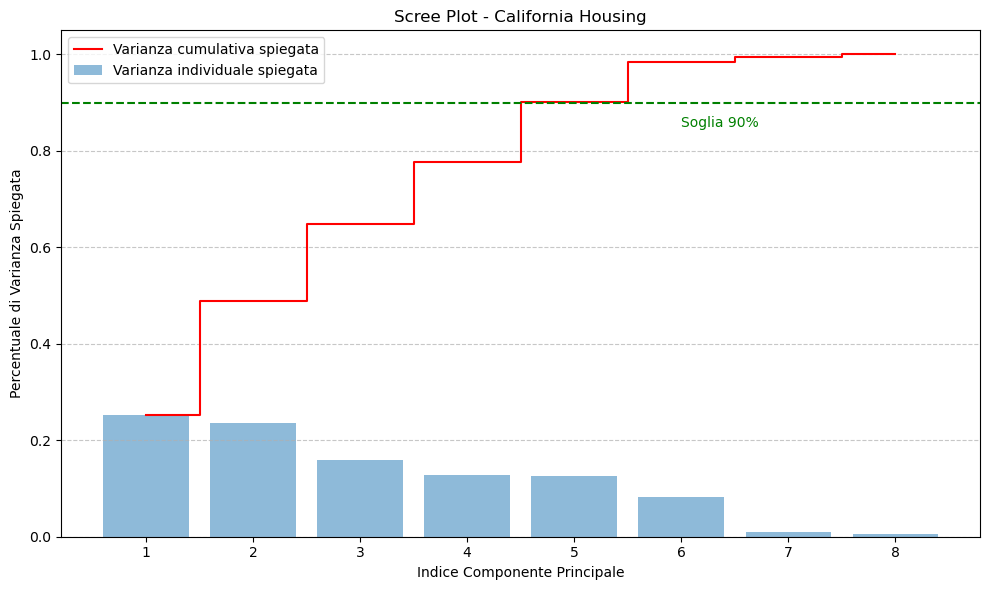


--- Analisi Varianza ---
Componente 1: 25.34% (Cumulativo: 25.34%)
Componente 2: 23.52% (Cumulativo: 48.85%)
Componente 3: 15.89% (Cumulativo: 64.74%)
Componente 4: 12.89% (Cumulativo: 77.63%)
Componente 5: 12.54% (Cumulativo: 90.17%)
Componente 6: 8.24% (Cumulativo: 98.41%)
Componente 7: 1.02% (Cumulativo: 99.43%)
Componente 8: 0.57% (Cumulativo: 100.00%)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Caricamento e Preparazione
# -----------------------------
california = fetch_california_housing()
X = california.data
feature_names = california.feature_names

print(f"Dimensioni originali: {X.shape} (Righe, Feature)")

# Standardizzazione (CRUCIALE: media=0, varianza=1)
# Senza questo, feature come 'Population' (migliaia) dominerebbero su 'AveRooms' (unità)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 2. PCA Completa (Senza ridurre ancora)
# -----------------------------
# Se non specifichiamo n_components, Scikit-learn le calcola tutte (in questo caso 8)
pca = PCA()
pca.fit(X_std)

# Calcoliamo la varianza spiegata cumulativa
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# 3. Creazione dello Scree Plot
# -----------------------------
plt.figure(figsize=(10, 6))

# Bar plot per la varianza della singola componente
plt.bar(range(1, len(exp_var_pca) + 1), exp_var_pca, alpha=0.5, align='center',
        label='Varianza individuale spiegata')

# Step plot per la varianza cumulativa
plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, where='mid',
         label='Varianza cumulativa spiegata', color='red')

# Etichette e abbellimenti
plt.ylabel('Percentuale di Varianza Spiegata')
plt.xlabel('Indice Componente Principale')
plt.title('Scree Plot - California Housing')
plt.legend(loc='best')
plt.xticks(range(1, len(exp_var_pca) + 1)) # Mostra tutti i numeri sull'asse X
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Linea guida al 90% (una soglia comune)
plt.axhline(y=0.90, color='green', linestyle='--', label='Soglia 90%')
plt.text(6, 0.85, 'Soglia 90%', color = 'green', fontsize=10)

plt.tight_layout()
plt.show()

# Stampa dei valori esatti per decidere
print("\n--- Analisi Varianza ---")
for i, (var, cum) in enumerate(zip(exp_var_pca, cum_sum_eigenvalues)):
    print(f"Componente {i+1}: {var*100:.2f}% (Cumulativo: {cum*100:.2f}%)")

### Applichiamo la PCA al nostro progetto

In [ ]:
import numpy as np
import pandas as pd
import optuna
import warnings
import itertools
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset e Preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # <--- IMPORTIAMO LA PCA
from sklearn.base import BaseEstimator, RegressorMixin

# Modelli
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, early_stopping, log_evaluation
from catboost import CatBoostRegressor

# Configurazione
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings('ignore')

# ---------------------------------------------------------
# 1. CARICAMENTO E PULIZIA DATI
# ---------------------------------------------------------
print("1. Caricamento e Pulizia Dati...")
start_global = time.time()

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="MedHouseVal")
df = pd.concat([X, y], axis=1)

# Rimuoviamo il cap a 5.0
df = df[df['MedHouseVal'] < 5.0]

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    indices_to_drop = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_clean[(df_clean[col] < Q1 - 2.0*IQR) | (df_clean[col] > Q3 + 2.0*IQR)].index
        indices_to_drop.extend(outliers)
    return df_clean.drop(list(set(indices_to_drop)))

cols_clean = ['AveRooms', 'AveBedrms', 'AveOccup', 'MedInc']
df = remove_outliers_iqr(df, cols_clean)
print(f"   -> Dataset pulito: {df.shape}")

# ---------------------------------------------------------
# 2. FEATURE ENGINEERING MASSIVA
# ---------------------------------------------------------
print("2. Generazione Feature 'Combo'...")

def generate_comprehensive_features(df_input, cols_to_combine):
    df_eng = df_input.copy()
    math_cols = [c for c in cols_to_combine if c not in ['Latitude', 'Longitude', 'Geo_Cluster']]
    
    # Trucco Rotazione Coordinate
    df_eng['Rot_45_LatLon'] = df_eng['Latitude'] + df_eng['Longitude']
    df_eng['Rot_N45_LatLon'] = df_eng['Latitude'] - df_eng['Longitude']

    # A. LOGARITMI
    for col in math_cols:
        if df_eng[col].min() >= 0:
            df_eng[f'LOG_{col}'] = np.log1p(df_eng[col])

    # B. MOLTIPLICAZIONI
    for col1, col2 in itertools.combinations(math_cols, 2):
        col_name = f'MULT_{col1}_x_{col2}'
        df_eng[col_name] = df_eng[col1] * df_eng[col2]

    # C. DIVISIONI
    for col1, col2 in itertools.permutations(math_cols, 2):
        col_name = f'RATIO_{col1}_div_{col2}'
        df_eng[col_name] = df_eng[col1] / (df_eng[col2] + 1e-5)

    return df_eng

# Geo Features
sf_coords = (37.7749, -122.4194)
la_coords = (34.0522, -118.2437)
df['Dist_SF'] = np.sqrt((df['Latitude'] - sf_coords[0])**2 + (df['Longitude'] - sf_coords[1])**2)
df['Dist_LA'] = np.sqrt((df['Latitude'] - la_coords[0])**2 + (df['Longitude'] - la_coords[1])**2)

coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=15, random_state=42, n_init=10)
df['Geo_Cluster'] = kmeans.fit_predict(StandardScaler().fit_transform(coords))

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

cols_for_math = [c for c in X.columns if c != 'Geo_Cluster']
X_full = generate_comprehensive_features(X, cols_for_math)
X_full.replace([np.inf, -np.inf], np.nan, inplace=True)
X_full.fillna(0, inplace=True)
print(f"   -> Totale Feature Generate: {X_full.shape[1]}")

# ---------------------------------------------------------
# 3. DIMENSIONALITY REDUCTION (PCA + SCREE PLOT)
# ---------------------------------------------------------
print("3. Applicazione PCA e Scree Plot...")

# 3.1 Standardizzazione (OBBLIGATORIA per PCA)
# Usiamo StandardScaler perché la PCA massimizza la varianza.
# (RobustScaler va bene per gli outlier, ma standardizzare a var=1 è standard per PCA)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_full)

# 3.2 Fit PCA Completa per analisi
pca_full = PCA()
pca_full.fit(X_scaled_pca)

# 3.3 Scree Plot
exp_var_pca = pca_full.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(exp_var_pca) + 1), exp_var_pca, alpha=0.5, label='Varianza individuale')
plt.step(range(1, len(cum_sum_eigenvalues) + 1), cum_sum_eigenvalues, where='mid', label='Varianza cumulativa', color='red')
plt.axhline(y=0.95, color='green', linestyle='--', label='Soglia 95%')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Scree Plot - Decisione Componenti')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# 3.4 Selezione Automatica Componenti (95% Varianza)
# Invece di n_components=int, passiamo un float tra 0 e 1.
# Scikit-learn sceglierà automaticamente il numero minimo di componenti per coprire quella varianza.
pca_final = PCA(n_components=0.95)
X_selected = pca_final.fit_transform(X_scaled_pca)

n_components_kept = X_selected.shape[1]
print(f"   -> PCA Completata. Feature ridotte da {X_full.shape[1]} a {n_components_kept}")
print(f"   -> Varianza totale conservata: {np.sum(pca_final.explained_variance_ratio_):.2%}")

# Split Principale (Train / Test)
# Nota: X_selected ora è un numpy array, perdiamo i nomi delle colonne ma va bene per i modelli
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# 4. OPTUNA REALE CON EARLY STOPPING
# ---------------------------------------------------------
print("\n4. Tuning Iperparametri con Optuna...")

X_opt_train, X_opt_val, y_opt_train, y_opt_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

N_TRIALS = 15 # Ridotto leggermente per brevità demo

# --- A. XGBoost Optimization ---
def objective_xgb(trial):
    params = {
        'n_estimators': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.95),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 0.95),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10.0, log=True),
        'tree_method': 'hist',
        'device': 'gpu',
        'n_jobs': 1,
        'random_state': 42,
        'early_stopping_rounds': 100
    }
    model = XGBRegressor(**params)
    model.fit(X_opt_train, y_opt_train, eval_set=[(X_opt_val, y_opt_val)], verbose=False)
    return np.sqrt(mean_squared_error(y_opt_val, model.predict(X_opt_val)))

print("   -> Optimizing XGBoost...")
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=N_TRIALS)

# --- B. CatBoost Optimization ---
def objective_cat(trial):
    params = {
        'iterations': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'depth': trial.suggest_int('depth', 6, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.95),
        'task_type': 'GPU',
        'devices': '0',
        'verbose': 0,
        'allow_writing_files': False,
        'random_state': 42,
        'eval_metric': 'RMSE'
    }
    model = CatBoostRegressor(**params)
    model.fit(X_opt_train, y_opt_train, eval_set=[(X_opt_val, y_opt_val)], early_stopping_rounds=100)
    return np.sqrt(mean_squared_error(y_opt_val, model.predict(X_opt_val)))

print("   -> Optimizing CatBoost...")
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=N_TRIALS)

# --- C. LightGBM Optimization ---
def objective_lgbm(trial):
    params = {
        'n_estimators': 3000,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 30, 200),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 0.95),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 0.95),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 10),
        'device': 'gpu', 
        'n_jobs': 1,
        'verbosity': -1,
        'random_state': 42,
        'metric': 'rmse'
    }
    model = LGBMRegressor(**params)
    callbacks = [early_stopping(stopping_rounds=100, verbose=False), log_evaluation(period=0)]
    try:
        model.fit(X_opt_train, y_opt_train, eval_set=[(X_opt_val, y_opt_val)], eval_metric='rmse', callbacks=callbacks)
    except:
        params['device'] = 'cpu'
        model = LGBMRegressor(**params)
        model.fit(X_opt_train, y_opt_train, eval_set=[(X_opt_val, y_opt_val)], eval_metric='rmse', callbacks=callbacks)
    return np.sqrt(mean_squared_error(y_opt_val, model.predict(X_opt_val)))

print("   -> Optimizing LightGBM...")
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(objective_lgbm, n_trials=N_TRIALS)

# Recupero best params
best_xgb_params = study_xgb.best_params
best_xgb_params.update({'n_estimators': 2000, 'tree_method': 'hist', 'device': 'gpu', 'n_jobs': 1, 'random_state': 42})
if 'early_stopping_rounds' in best_xgb_params: del best_xgb_params['early_stopping_rounds']

best_cat_params = study_cat.best_params
best_cat_params.update({'iterations': 2000, 'task_type': 'GPU', 'devices': '0', 'verbose': 0, 'random_state': 42})

best_lgbm_params = study_lgbm.best_params
best_lgbm_params.update({'n_estimators': 2000, 'device': 'gpu', 'n_jobs': 1, 'verbosity': -1, 'random_state': 42})

# ---------------------------------------------------------
# 5. SMART SOFT MODEL SELECTOR (MoE)
# ---------------------------------------------------------
print("\n5. Costruzione Smart Soft Selector (MoE)...")


class SmartSoftModelSelector(BaseEstimator, RegressorMixin):
    def __init__(self, estimators, selector_model=None):
        self.estimators = estimators
        self.selector_model = selector_model if selector_model else XGBClassifier(
            n_estimators=200, max_depth=6, learning_rate=0.05,
            tree_method='hist', device='gpu', n_jobs=1, random_state=42
        )
        self.model_names = [name for name, _ in estimators]
        
    def fit(self, X, y):
        self.fitted_estimators_ = []
        for name, model in self.estimators:
            model.fit(X, y)
            self.fitted_estimators_.append(model)
            
        # Generazione OOF per il Selettore
        errors = pd.DataFrame()
        for name, model in self.estimators:
            oof_preds = cross_val_predict(model, X, y, cv=5, n_jobs=1)
            errors[name] = np.abs(y - oof_preds)
            
        y_best_model_idx = errors.idxmin(axis=1).apply(lambda x: self.model_names.index(x))
        self.selector_model.fit(X, y_best_model_idx)
        return self

    def predict(self, X):
        base_preds = np.column_stack([model.predict(X) for model in self.fitted_estimators_])
        weights = self.selector_model.predict_proba(X)
        final_pred = np.sum(base_preds * weights, axis=1)
        return final_pred

estimators_list = [
    ('xgb', XGBRegressor(**best_xgb_params)),
    ('cat', CatBoostRegressor(**best_cat_params)),
    ('lgbm', LGBMRegressor(**best_lgbm_params)) 
]

moe_model = SmartSoftModelSelector(estimators=estimators_list)
moe_model.fit(X_train, y_train)

# ---------------------------------------------------------
# 6. RESIDUAL LEARNING
# ---------------------------------------------------------
print("\n6. Training Correttore dei Residui...")

class ResidualCorrectedMoE(BaseEstimator, RegressorMixin):
    def __init__(self, base_moe_model, corrector_model=None):
        self.base_moe_model = base_moe_model
        self.corrector_model = corrector_model if corrector_model else CatBoostRegressor(
            iterations=500, depth=6, learning_rate=0.03, l2_leaf_reg=5, 
            task_type='GPU', devices='0', verbose=0, allow_writing_files=False, random_state=42
        )
        
    def fit(self, X, y):
        # Calcolo residui OOF
        oof_preds = cross_val_predict(self.base_moe_model, X, y, cv=5, n_jobs=1)
        residuals = y - oof_preds
        self.corrector_model.fit(X, residuals)
        return self

    def predict(self, X):
        base_pred = self.base_moe_model.predict(X)
        correction = self.corrector_model.predict(X)
        return base_pred + correction

final_system = ResidualCorrectedMoE(base_moe_model=moe_model)
final_system.fit(X_train, y_train)

# Valutazione
y_pred_corrected = final_system.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_corrected))
final_r2 = r2_score(y_test, y_pred_corrected)

print(f"\n==========================================")
print(f" RISULTATI FINALI (con PCA)")
print(f"==========================================")
print(f" RMSE: {final_rmse:.5f}")
print(f" R^2 : {final_r2:.5f}")
print(f"==========================================")